In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns 
%load_ext autoreload
%autoreload 2

# Data project: Waste in Zürich

The project focuses on the study of the amount of waste produced in the different municipalities of the canton of Zürich, its price for the population and its evolution since 2000. 

The information to conduct our project is available from three different datasets: population, quantities, and prices. Every dataset contains the ID for each municipality, the municipality name and the year. We also have information about the different types of waste produced. However, we will mainly focus only in the "Brennbare Abfälle und Sperrgut" as it is the non-recyclable one and, therefore, it has a monetary cost for the population in Switzerland. 

In [2]:
# First of all, we print the information and columns from the datasets 'Prices' and 'Quantity' to check how our data looks like.
prices = pd.read_csv('Prices.csv')
quantity = pd.read_csv('Quantity.csv')
print(prices.columns, quantity.columns)
prices.sample(10)

Index(['Year', 'ID', 'Municipality', 'Category', 'Price', 'Currency'], dtype='object') Index(['Year', 'ID', 'Municipality', 'Type', 'Value_t', 'Unit'], dtype='object')


,Year,ID,Municipality,Category,Price,Currency
6143,2020,220,Hagenbuch,35-L-Sack,1.50,CHF
3569,2018,101,Steinmaur,35-L-Sack,1.65,CHF
678,2011,21,Adlikon,35-L-Sack,1.60,CHF
6802,2005,245,Oberengstringen,35-L-Sack,2.00,CHF
183,2000,4,Hausen a.A.,35-L-Sack,2.50,CHF
3737,2011,113,Dürnten,Grundgebuehr,50.00,CHF
7069,2014,251,Weiningen,35-L-Sack,1.70,CHF
4068,2002,120,Wald,Grundgebuehr,80.00,CHF
7106,2000,261,Zürich,Grundgebuehr,107.50,CHF
2805,2000,84,Dällikon,35-L-Sack,2.50,CHF


In [3]:
# We also print for the 'Quantity' and the 'Prices' the time frame and how many municipalities each dataset contains. We confirm that they cover the same amount of data.
print('The quantity data set covers', min(quantity['Year']), 'until', max(quantity['Year']),'and contains',max(quantity['ID']),'municipalities')
print('The prices data set covers', min(prices['Year']), 'until', max(prices['Year']), 'and contains',max(prices['ID']),'municipalities')

The quantity data set covers 2000 until 2021 and contains 298 municipalities
The prices data set covers 2000 until 2022 and contains 298 municipalities


## Data cleaning and preparation

### Merging Quantity and Prices

In [4]:
# We start organizing our data by merging both 'Quantity' and 'Prices' based on 'Year and 'ID'.
prices_quantity = pd.merge(prices, quantity, on=['Year', 'ID'])

# By printing our new dataset 'prices_quantity' we confirm that the data has merged properly.
prices_quantity

,Year,ID,Municipality_x,Category,Price,Currency,Municipality_y,Type,Value_t,Unit
0,2021,1,Aeugst a.A.,Grundgebuehr,204.63,CHF,Aeugst a.A.,Brennbare Abfälle und Sperrgut,323.0,Tonnen
1,2021,1,Aeugst a.A.,Grundgebuehr,204.63,CHF,Aeugst a.A.,Biogene Abfälle,384.0,Tonnen
2,2021,1,Aeugst a.A.,Grundgebuehr,204.63,CHF,Aeugst a.A.,Papier,81.0,Tonnen
3,2021,1,Aeugst a.A.,Grundgebuehr,204.63,CHF,Aeugst a.A.,Karton,59.0,Tonnen
4,2021,1,Aeugst a.A.,Grundgebuehr,204.63,CHF,Aeugst a.A.,Papier + Karton falls nicht separat angegeben,NaN,Tonnen
...,...,...,...,...,...,...,...,...,...,...
69331,2000,298,Wiesendangen,35-L-Sack,1.80,CHF,Wiesendangen,Papier + Karton falls nicht separat angegeben,0.0,Tonnen
69332,2000,298,Wiesendangen,35-L-Sack,1.80,CHF,Wiesendangen,Glas,828.0,Tonnen
69333,2000,298,Wiesendangen,35-L-Sack,1.80,CHF,Wiesendangen,Metalle,382.0,Tonnen
69334,2000,298,Wiesendangen,35-L-Sack,1.80,CHF,Wiesendangen,Altöl,3.0,Tonnen


### Cleaning Population Data

Now that we have the prices and the quantities merged, we need to merge these two with the population. However, we first need to do some adjustments in order to work with the Excel file here in Python. Take a look in the a snippet of the Excel file in order understand the issue.

The process involves many steps and you are free to skip the chapter and continue with the Final Dataframe subsection. 


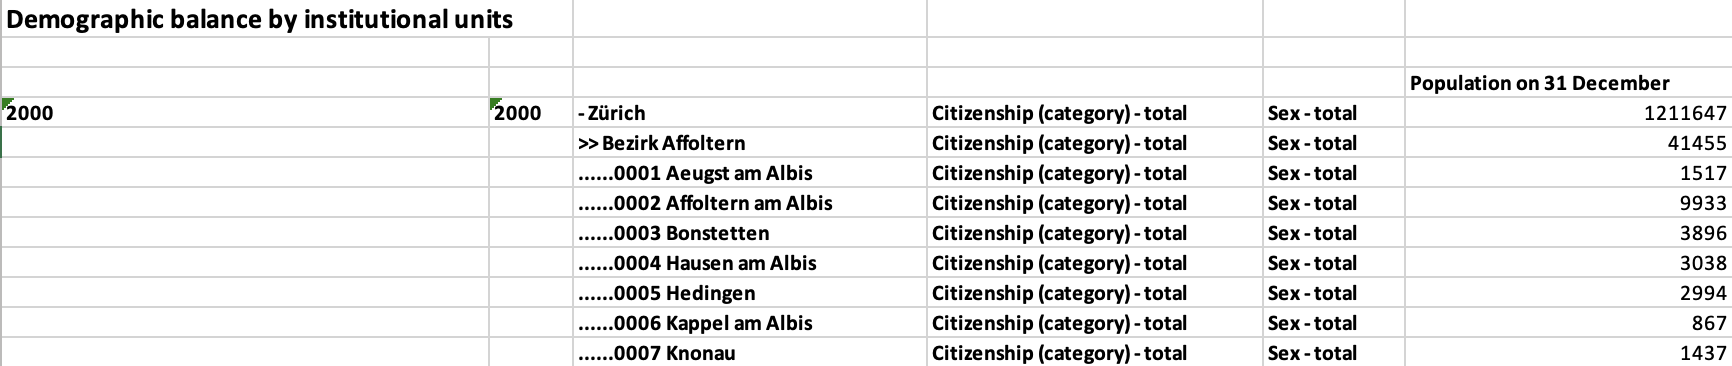

#### Positioning 

In [5]:
# The population dataset is contained in an Excel file, not a csv. 
# The next code is reading the Excel file and extracting the 'Unnamed: 1' column, converting it into a Numpy array for further analysis.
ind = pd.read_excel('population_2.xlsx',skiprows=2)['Unnamed: 1'].values

# A new list "l" with the years in order is created.
l =[]
for i in ind:
    if i >200:
        print(i)
        k = i
    else: i =k
    l.append(k)


2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
2017.0
2018.0
2019.0
2020.0
2021.0


In [6]:
# The new list "l" containint the years is renamed as "IDX". 
df =pd.read_excel('population_2.xlsx',skiprows=2)
df["IDX"] =l
# The last 39 tails of the dataframe are eliminated as they do not contain useful information for our analysis.
df.tail(50)
end =3714 - 3675	
df = df[:-end-1]
# We check that, in fact, both the head and the tail of our dataset looks properly.
#df["Unnamed: 2"].value_counts() remove hashtag to check

# We isolate the important columns, the municipalities, the population and the year.
df = df[['Unnamed: 2','Population on 31 December', 'IDX']]

#### Extracting ID 

In [7]:
# However, we still need the municipalities column ('Unnamed:2') to be more organized and to only contain those which have an ID number attached to them.
# We then create a boolean mask based on the values in the "Unnamed: 2" column.
mask = df["Unnamed: 2"].str.contains("0")

# Afterwards, we filter the DataFrame to show only the rows that meet the condition.
filtered_df = df[mask]

#Renaming:
new_names = {'Unnamed: 2': 'Municipality', 'Population on 31 December': 'Population', 'IDX': 'Year'}

# Rename the columns using the dictionary.
filtered_df = df[mask].rename(columns=new_names)


# Print the filtered DataFrame.
#filtered_df        Remove hashtag to track process

#### Final Population Dataframe

In [8]:
# We divide now the DataFrame "filtered_df" in order to have the ID from the municipality in other column and merge it with the quantity data.

# We split the Municipality column into two columns.
filtered_df[['ID', 'Municipality']] = filtered_df['Municipality'].str.split(' ', 1, expand=True)

# Then remove the leading zeros and convert the ID column to integer.
filtered_df['ID'] = filtered_df['ID'].str[6:].astype(int)

# Lastly, we print the resulting dataframe with the new columns.
print(filtered_df[['ID', 'Municipality', 'Population', 'Year']])


       ID        Municipality  Population    Year
2       1     Aeugst am Albis      1517.0  2000.0
3       2  Affoltern am Albis      9933.0  2000.0
4       3          Bonstetten      3896.0  2000.0
5       4     Hausen am Albis      3038.0  2000.0
6       5            Hedingen      2994.0  2000.0
...   ...                 ...         ...     ...
3844  248             Uitikon      5030.0  2021.0
3845  249    Unterengstringen      4116.0  2021.0
3846  250              Urdorf     10222.0  2021.0
3847  251      Weiningen (ZH)      4863.0  2021.0
3849  261              Zürich    423193.0  2021.0

[3564 rows x 4 columns]


#### Merging and filtering

In [9]:
# Now we merge 'filtered_df' with 'quantity' to have the whole dataset:

merged_df = pd.merge(filtered_df, prices_quantity, on=['Year', 'ID'])
merged_df.head(20)

,Municipality,Population,Year,ID,Municipality_x,Category,Price,Currency,Municipality_y,Type,Value_t,Unit
0,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Brennbare Abfälle und Sperrgut,240.0,Tonnen
1,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Biogene Abfälle,161.0,Tonnen
2,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Papier,61.0,Tonnen
3,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Karton,54.0,Tonnen
4,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Papier + Karton falls nicht separat angegeben,0.0,Tonnen
5,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Glas,65.0,Tonnen
6,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Metalle,12.0,Tonnen
7,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Altöl,1.0,Tonnen
8,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,Grundgebuehr,170.0,CHF,Aeugst a.A.,Grubengut,0.0,Tonnen
9,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,35-L-Sack,2.0,CHF,Aeugst a.A.,Brennbare Abfälle und Sperrgut,240.0,Tonnen


In [10]:
# We then use a boolean indexer to show only the data from 'Category' that contains '35-L-Sack', and from 'Type' only data that contains 'Brennbare Abfälle und Sperrgut'.
bool_index = (merged_df['Category'] == '35-L-Sack') & (merged_df['Type'] == 'Brennbare Abfälle und Sperrgut')
finalmerged_df = merged_df[bool_index]

# We print the resulting DataFrame.
finalmerged_df.head(20)

,Municipality,Population,Year,ID,Municipality_x,Category,Price,Currency,Municipality_y,Type,Value_t,Unit
9,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,35-L-Sack,2.0,CHF,Aeugst a.A.,Brennbare Abfälle und Sperrgut,240.0,Tonnen
27,Affoltern am Albis,9933.0,2000.0,2,Affoltern a.A.,35-L-Sack,2.5,CHF,Affoltern a.A.,Brennbare Abfälle und Sperrgut,1612.0,Tonnen
45,Bonstetten,3896.0,2000.0,3,Bonstetten,35-L-Sack,2.5,CHF,Bonstetten,Brennbare Abfälle und Sperrgut,535.0,Tonnen
63,Hausen am Albis,3038.0,2000.0,4,Hausen a.A.,35-L-Sack,2.5,CHF,Hausen a.A.,Brennbare Abfälle und Sperrgut,438.0,Tonnen
81,Hedingen,2994.0,2000.0,5,Hedingen,35-L-Sack,2.5,CHF,Hedingen,Brennbare Abfälle und Sperrgut,619.0,Tonnen
99,Kappel am Albis,867.0,2000.0,6,Kappel a.A.,35-L-Sack,2.5,CHF,Kappel a.A.,Brennbare Abfälle und Sperrgut,120.0,Tonnen
117,Knonau,1437.0,2000.0,7,Knonau,35-L-Sack,2.5,CHF,Knonau,Brennbare Abfälle und Sperrgut,230.0,Tonnen
135,Maschwanden,580.0,2000.0,8,Maschwanden,35-L-Sack,2.5,CHF,Maschwanden,Brennbare Abfälle und Sperrgut,58.0,Tonnen
153,Mettmenstetten,3665.0,2000.0,9,Mettmenstetten,35-L-Sack,2.0,CHF,Mettmenstetten,Brennbare Abfälle und Sperrgut,487.0,Tonnen
171,Obfelden,4183.0,2000.0,10,Obfelden,35-L-Sack,2.5,CHF,Obfelden,Brennbare Abfälle und Sperrgut,705.0,Tonnen


### Final Dataframe containing population, quantity and prices

In [11]:
# In order to show how much does that waste cost per person, we construct a new column that shows it: (Value_y/Population)
finalmerged_df['Waste per person'] = finalmerged_df['Value_t'] / finalmerged_df['Population']

# We then print the final DataFrame.
finalmerged_df

/var/folders/yf/cbyzbr7d3hl8n98r3rphk8wh0000gn/T/ipykernel_56808/1762863462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalmerged_df['Waste per person'] = finalmerged_df['Value_t'] / finalmerged_df['Population']


,Municipality,Population,Year,ID,Municipality_x,Category,Price,Currency,Municipality_y,Type,Value_t,Unit,Waste per person
9,Aeugst am Albis,1517.0,2000.0,1,Aeugst a.A.,35-L-Sack,2.00,CHF,Aeugst a.A.,Brennbare Abfälle und Sperrgut,240.0,Tonnen,0.158207
27,Affoltern am Albis,9933.0,2000.0,2,Affoltern a.A.,35-L-Sack,2.50,CHF,Affoltern a.A.,Brennbare Abfälle und Sperrgut,1612.0,Tonnen,0.162287
45,Bonstetten,3896.0,2000.0,3,Bonstetten,35-L-Sack,2.50,CHF,Bonstetten,Brennbare Abfälle und Sperrgut,535.0,Tonnen,0.137320
63,Hausen am Albis,3038.0,2000.0,4,Hausen a.A.,35-L-Sack,2.50,CHF,Hausen a.A.,Brennbare Abfälle und Sperrgut,438.0,Tonnen,0.144174
81,Hedingen,2994.0,2000.0,5,Hedingen,35-L-Sack,2.50,CHF,Hedingen,Brennbare Abfälle und Sperrgut,619.0,Tonnen,0.206747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69219,Uitikon,5030.0,2021.0,248,Uitikon,35-L-Sack,2.07,CHF,Uitikon,Brennbare Abfälle und Sperrgut,989.0,Tonnen,0.196620
69245,Unterengstringen,4116.0,2021.0,249,Unterengstringen,35-L-Sack,1.70,CHF,Unterengstringen,Brennbare Abfälle und Sperrgut,651.0,Tonnen,0.158163
69271,Urdorf,10222.0,2021.0,250,Urdorf,35-L-Sack,2.00,CHF,Urdorf,Brennbare Abfälle und Sperrgut,2213.0,Tonnen,0.216494
69297,Weiningen (ZH),4863.0,2021.0,251,Weiningen,35-L-Sack,1.70,CHF,Weiningen,Brennbare Abfälle und Sperrgut,848.0,Tonnen,0.174378


## Plots

#### Find Averagetown

As we have too many municipalities to plot them all, we create the municipality 'Averagetown'.

In [12]:
# Calculate the average waste per person and price per year
average_data = finalmerged_df.groupby('Year').agg({'Waste per person': 'mean', 'Price': 'mean'}).reset_index()
average_data['Municipality'] = 'Averagetown'
average_data['ID'] = 6666
# Add the average data as a row to the dataframe
finalmerged_df = pd.concat([finalmerged_df, average_data], ignore_index=True)

#### Waste per capita
On average, we note a clear downward trend in the non-recycled waste per capita. We highlight the remarkable average waste being around 200 kg per capita.


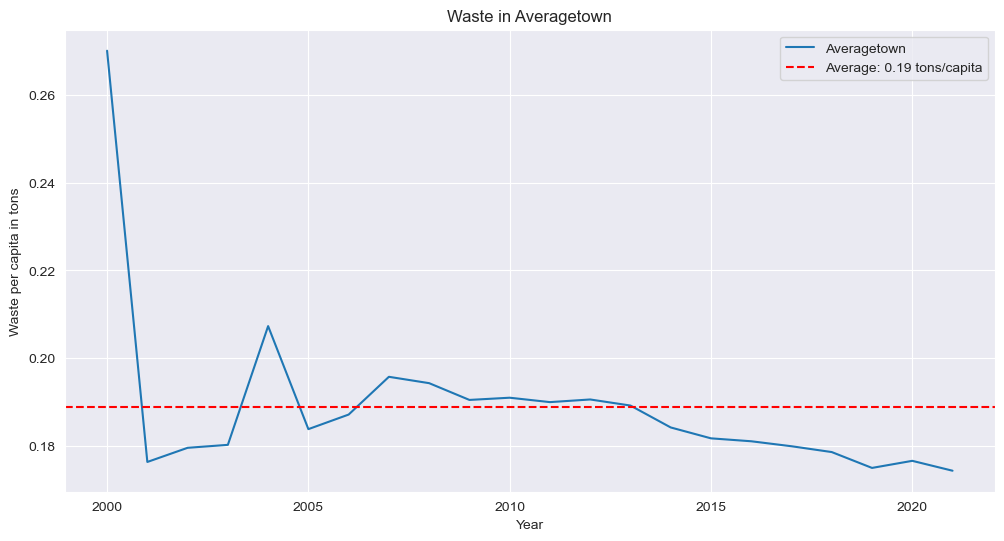

In [14]:
f = finalmerged_df[finalmerged_df['Municipality'].isin(sorted(finalmerged_df['Municipality'].unique())[:8])] #Uncomment to see some examples
filtered_df = finalmerged_df[finalmerged_df['Municipality']== 'Averagetown'] #Displaying just averagetown
# Then, we plot the filtered data as a line plot.
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="Waste per person", hue="Municipality")
mean_waste = filtered_df['Waste per person'].mean() #Find the average over time
plt.axhline(y=mean_waste, color='red', linestyle='--', label=(f'Average: {mean_waste:.2f} tons/capita')) #Plot average
plt.title("Waste in Averagetown")
plt.xlabel("Year")
plt.legend()
plt.ylabel("Waste per capita in tons")
plt.show()

### Price for disposal

We see the price of disposing 35-l of non recycled trash. Although the movement is noticiable graphically, we want to highlight that the distance from the highest to the lowest price is roughly 0.5 CHF, corresponding to around 3.8 DKK. 

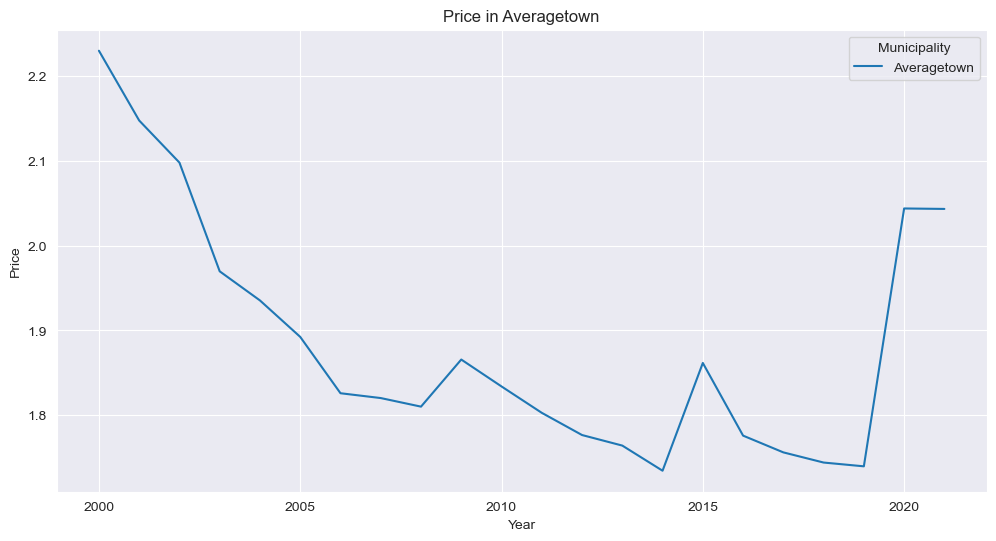

In [15]:
#filtered_df = finalmerged_df[finalmerged_df['Municipality'].isin(sorted(finalmerged_df['Municipality'].unique())[:8])] Uncomment to see some examples
filtered_df = finalmerged_df[finalmerged_df['Municipality']== 'Averagetown']
# Then, we plot the filtered data as a line plot.
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x="Year", y="Price", hue="Municipality")
plt.title("Price in Averagetown")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

### Interactive plots
The tool below will allow you to explore the waste per capita trend for each municipality individually. Obviously, some municipalities will deviate from the trend. This was only done for waste per capita as there was less movement than expected in the price. 

The following installation may be needed first : $$\textbf{pip install ipywidgets IPython seaborn}$$

Dropdown(description='Municipality:', index=3, options=('Adlikon', 'Adliswil', 'Aesch (ZH)', 'Aeugst am Albis'…

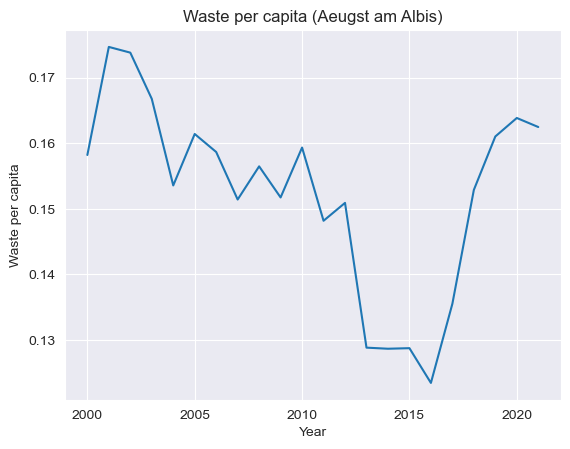

In [16]:
import ipywidgets as widgets
from IPython.display import display

# Get list of unique municipalities
municipalities = sorted(finalmerged_df["Municipality"].unique())

# Create dropdown menu with list of municipalities
dropdown = widgets.Dropdown(options=municipalities, value="Aeugst am Albis", description="Municipality:")

def update_plot(municipality):
    # Filter data for selected municipality
    data = finalmerged_df[finalmerged_df["Municipality"] == municipality]
    
    # Plot data for selected municipality
    sns.lineplot(data=data, x="Year", y="Waste per person")
    plt.title(f"Waste per capita ({municipality})")
    plt.xlabel("Year")
    plt.ylabel("Waste per capita")
    plt.show()

# Display dropdown menu and plot
display(dropdown)
update_plot(dropdown.value)

# Update plot when dropdown value changes
dropdown.observe(lambda event: update_plot(event.new), names="value")
#This will create a dropdown menu with a list of unique municipalities from the finalmerged_df dataframe, and plot the data for the initially selected municipality. The plot will update automatically whenever a new municipality is selected from the dropdown menu